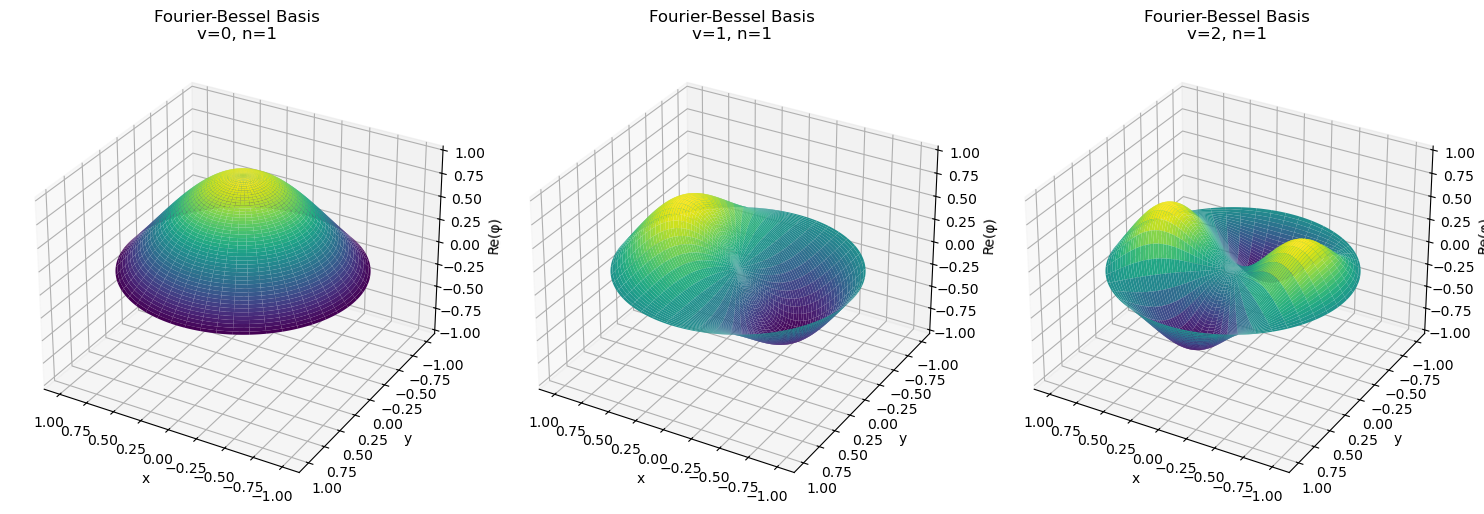

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn, jn_zeros

def fourier_bessel_basis(v, n, r, theta):
    """
    Compute the Fourier-Bessel basis function phi_{vn}(r, theta) = J_v(alpha_{vn} * r) * exp(i * v * theta)
    
    Parameters:
    - v: angular order (int)
    - n: radial mode (int)
    - r: radial coordinate (array)
    - theta: angular coordinate (array)
    
    Returns:
    - phi_vn: complex-valued basis function evaluated at (r, theta)
    """
    # Find nth root of Bessel function J_m
    alpha_vn = jn_zeros(v, n)[-1]  # nth zero of J_v
    
    # Radial part
    radial = jn(v, alpha_vn * r)
    # Angular part
    angular = np.exp(1j * v * theta)
    
    return radial * angular

# Create a grid in polar coordinates
nr, ntheta = 300, 300
r = np.linspace(0, 1, nr)
theta = np.linspace(0, 2*np.pi, ntheta)
R, Theta = np.meshgrid(r, theta)

# Convert to Cartesian for plotting
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

# Choose basis indices (v, n)
v_values = [0, 1, 2]
n_values = [1, 1, 1]

fig, axs = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': '3d'})

for i, (v, n) in enumerate(zip(v_values, n_values)):
    phi = fourier_bessel_basis(v, n, R, Theta)
    # Take real part for plotting
    Z = phi.real
    
    ax = axs[i]
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set_title(f'Fourier-Bessel Basis\nv={v}, n={n}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('Re(φ)')
    ax.set_zlim(-1, 1)
    ax.view_init(elev=30, azim=120)

plt.tight_layout()
plt.show()

C:\Users\mpstme.student\AppData\Local\Temp\ipykernel_8916\255694427.py:29: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  c = ax.pcolormesh(X, Y, Z, shading='auto', cmap='coolwarm')


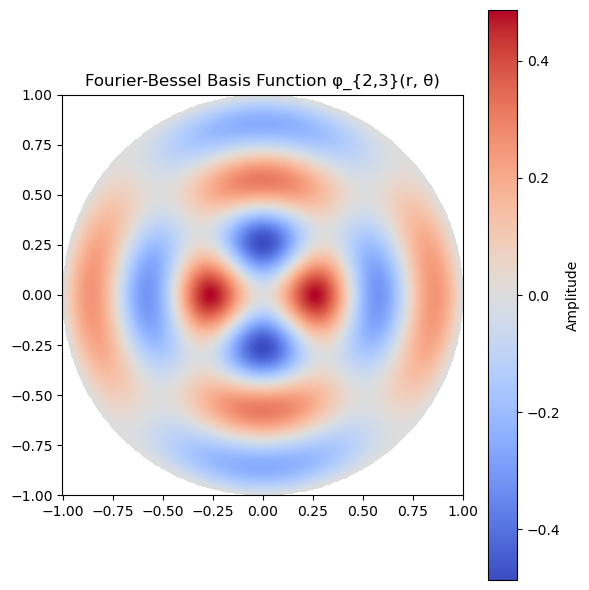

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn, jn_zeros

# Define Fourier-Bessel basis function
def fourier_bessel_basis(m, n, r, theta, R=1.0):
    zeros = jn_zeros(m, n)
    alpha_mn = zeros[-1]  # nth zero of Bessel function J_m
    return jn(m, alpha_mn * r / R) * np.cos(m * theta)

# Create polar grid
nr, ntheta = 300, 300
r = np.linspace(0, 1, nr)
theta = np.linspace(0, 2 * np.pi, ntheta)
R, Theta = np.meshgrid(r, theta)

# Convert to Cartesian for plotting
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

# Choose basis indices
m, n = 2, 3  # Example: angular mode 2, radial mode 3

# Compute basis function
Z = fourier_bessel_basis(m, n, R, Theta)

# Plot the basis function
fig, ax = plt.subplots(figsize=(6, 6))
c = ax.pcolormesh(X, Y, Z, shading='auto', cmap='coolwarm')
ax.set_title(f'Fourier-Bessel Basis Function φ_{{{m},{n}}}(r, θ)')
ax.set_aspect('equal')
plt.colorbar(c, ax=ax, label='Amplitude')
plt.tight_layout()
plt.show()